# Computational Physics Project - RK4 Method

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Initializing constants

In [55]:
B0 =  3.12E-5
q = -1.6E-19 # charge of electron
m = 9.1E-31 # mass of electron
RE = 6400000 # radius of earth

In [56]:
dt = 1.e-7
N = 10000000

### Initial Conditions

In [57]:
E0 = abs(30E3 * q)
v0 = np.sqrt(2*E0/m)
t0 = 0

In [58]:
x0 = 2*RE
y0 = 0
z0 = 0
v_x0 = 0
v_y0 = v0*np.cos(np.pi/4)
v_z0 = v0*np.sin(np.pi/4)
f0 = np.array([x0, y0, z0, v_x0, v_y0, v_z0])

### Conversion from Spherical to Cartesian

In [59]:
def spherical_to_cartesian(vector_spherical, r, theta, phi):
    transformation_matrix = np.array(
        [[np.sin(theta)*np.cos(phi), np.cos(theta)*np.cos(phi), -np.sin(phi)],
         [np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi), np.cos(phi)],
         [np.cos(theta)            , -np.sin(theta)           , 0]]
    )
    vector_cartesian = np.dot(transformation_matrix, vector_spherical)
    return vector_cartesian

### Definition of G vector

In [60]:
def G(farray, t):

    x = farray[0]
    y = farray[1]
    z = farray[2]
    v_x = farray[3]
    v_y = farray[4]
    v_z = farray[5]

    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan(y/x)
    phi = np.arccos(z/r)

    B_r = -2*B0*((RE/r)**3)
    B_theta = -B0*((RE/r)**3)*np.sin(theta)
    B_phi = 0

    B_spherical = np.array([B_r, B_theta, B_phi])
    B_cartesian = spherical_to_cartesian(B_spherical, r, theta, phi)

    # if(t==0): print(B_cartesian)

    B_x = B_cartesian[0]
    B_y = B_cartesian[1]
    B_z = B_cartesian[2]

    a_x = (q/m)*(v_y*B_z - v_z*B_y)
    a_y = (q/m)*(v_z*B_x - v_x*B_z)
    a_z = (q/m)*(v_x*B_y - v_y*B_x)

    return np.array([v_x, v_y, v_z, a_x, a_y, a_z])

### RK-4 Method

In [61]:
fsol = [f0]
t = [t0]
for i in range(N):
    k1 = dt*G(f0, t0)
    k2 = dt*G(f0 + k1*0.5, t0+dt*0.5)
    k3 = dt*G(f0 + k2*0.5, t0+dt*0.5)
    k4 = dt*G(f0 + k3, t0 + dt)
    f1 = f0 + (k1*0.5 + k2 + k3 + k4*0.5)/3.0

    fsol.append(f1)

    t0 = t0+dt
    t.append(t0)
    f0 = f1

fsol = np.array(fsol)

In [62]:
np.save('fsol.npy', fsol)

### Trajectory Plots

In [4]:
fsol = np.load('fsol.npy')

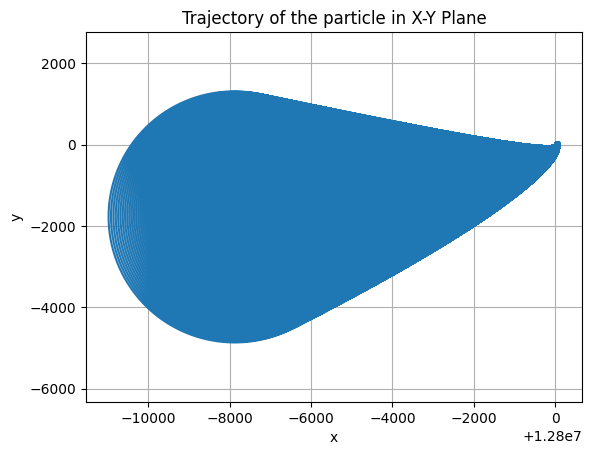

In [5]:
plt.plot(fsol[:,0], fsol[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the particle in X-Y Plane')
plt.grid(True)
plt.axis('equal')
plt.show()

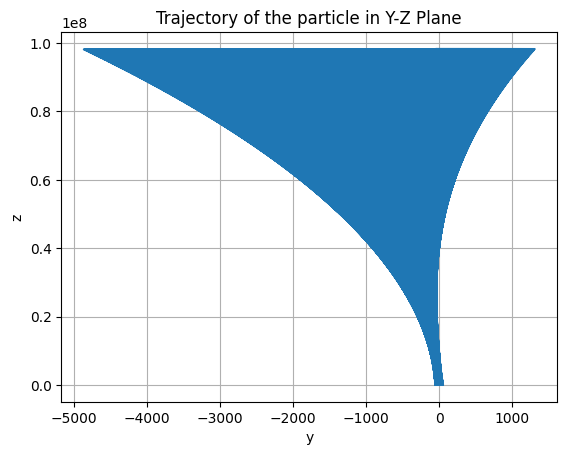

In [6]:
plt.plot(fsol[:,1], fsol[:, 2])
plt.xlabel('y')
plt.ylabel('z')
plt.title('Trajectory of the particle in Y-Z Plane')
plt.grid(True)
plt.show()

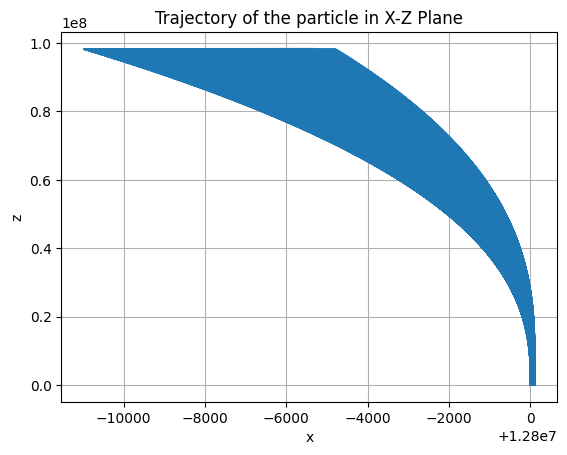

In [7]:
plt.plot(fsol[:,0], fsol[:, 2])
plt.xlabel('x')
plt.ylabel('z')
plt.title('Trajectory of the particle in X-Z Plane')
plt.grid(True)
plt.show()

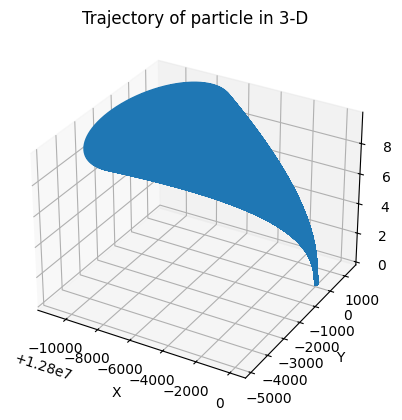

In [8]:
x = fsol[:, 0]
y = fsol[:, 1]
z = fsol[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)
# ax.scatter(fsol[0][0], fsol[0][1], fsol[0][2], color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Trajectory of particle in 3-D')
plt.show()

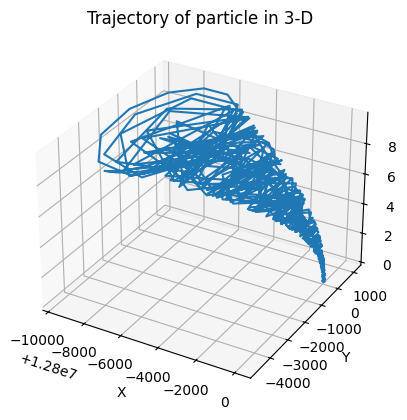

In [39]:
skip = 20000

x = fsol[:, 0][::skip]
y = fsol[:, 1][::skip]
z = fsol[:, 2][::skip]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)
# ax.scatter(fsol[0][0], fsol[0][1], fsol[0][2], color='black')

# ax.set_zlim(0, 1e7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Trajectory of particle in 3-D')
plt.show()

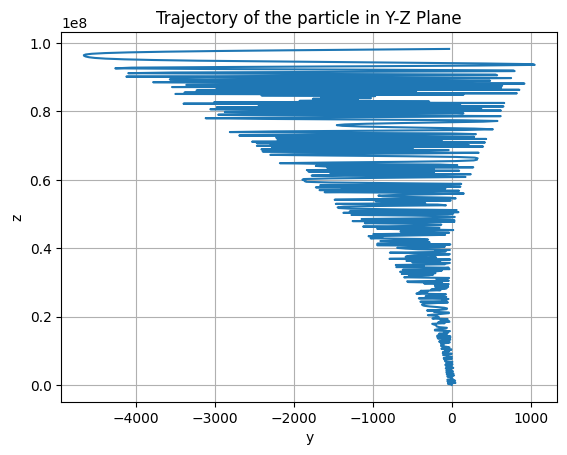

In [40]:
plt.plot(y, z)
plt.xlabel('y')
plt.ylabel('z')
plt.title('Trajectory of the particle in Y-Z Plane')
plt.grid(True)
plt.show()

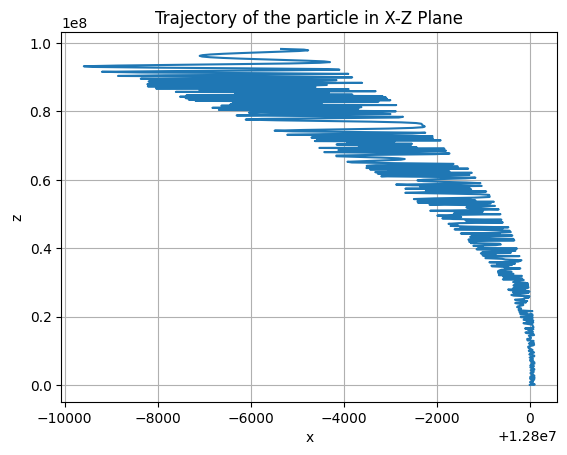

In [41]:
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Trajectory of the particle in X-Z Plane')
plt.grid(True)
plt.show()

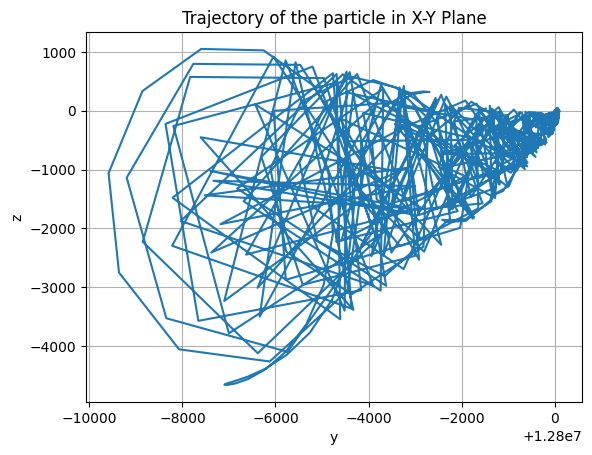

In [42]:
plt.plot(x, y)
plt.xlabel('y')
plt.ylabel('z')
plt.title('Trajectory of the particle in X-Y Plane')
plt.grid(True)
plt.show()